# **Imports**

In [1]:
!pip install torchvision
!pip install torchsummary
!pip install tensorboard
!pip install mercury

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 18.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.2/779.2 MB 17.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 17.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 MB 12.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: triton
    Found existing installation: triton 2.1.0
    Uninstalling triton-2.1.0:
      Successfully uninstalled triton-2.1.0
  Attempting uninstall: nvidia-nccl-cu12
    Found existing installation: nvidia-nccl-cu12 2.18.1
    Uninstalling nvidia-nccl-cu12-2.18.1:
      Successfully uninstalled nvidia-nccl-cu12-2.18.1
  Attempting uninstall: torch
    Found existing installation: torch 2.1.2
    Uninstalling tor

In [2]:
import os
os.getcwd()

'/home/jovyan/Carlos_Gonzalez/YOLO'

In [ ]:
!python simulated_annealing_Slices.py

##############################################################
              Simulation 1 of 1         
##############################################################
=> Loading checkpoint
=> Loading checkpoint
Eval: Annealing: : 100%|████████████████████████| 92/92 [00:02<00:00, 34.64it/s]
---------------------------------------------------
-------------Loss Summary eval {mode}--------------
Total Loss  |Loss Coord  |Conf Loss   |No Obj Loss |Class Loss  |
11.901      |5.670       |3.707       |2.480       |0.044       |
---------------------------------------------------
Initial mAP50: 0.752, Initial avg bits: 32.000, Initial size: 3.445 MB
Initial fractional part: [26, 23, 26, 24, 24, 26, 23, 24, 26, 25, 25, 31, 26, 24, 27, 23, 24, 29, 26, 25, 25, 27, 25, 26, 22, 23, 25, 25, 24, 32, 25, 21, 24, 23]
################################################
       Slice  1 of 5      
################################################
State: [4, 8, 8, 6, 6, 10, 5, 24, 26, 25, 25, 31, 26, 24, 27, 

# **YOLO** 

## **Explicación YOLO**

**YOLO** o **You Only Look Once** ([paper](https://arxiv.org/pdf/1506.02640)) es un algoritmo de detección de objetos. Este algoritmo de detección de objetos se centra en la predicción de Bounadry Boxes para los diferentes objetos con su posterior clasificación. El primer modelo de YOLO propuesto en 2016 donde era capaz de cometer más errores de localización de objetos, pero era menos probable que predijese falsos positivos en el fondo de las imagenes. 

El algoritmo de YOLO, como su nombre indica se centra se mira una unica vez a la imagen para predecir los objetos, para ello, se utiliza una secuencia de CNN que permite predecir las diferentes Boundary Boxes (BB) (o cajas delimitadoras) que permiten identificar donde se encuentra el objeto. Esta arquitectura es tan simple que permite predecir de manera muy rápida, es decir, tiene una latencia muy baja. Esto a permitido a YOLO ser más rápido que otros modelos pero menos preciso.

El sistema YOLO divide las imagenes en celdas o grid, en un total de SxS (S=Split Size). Si el centro de una imagen se encuentra dentro de una celda, esta celda será la encargada en detectar el objeto.

El siguiente ejemplo se muestra una imagen en la que el split size es 3 (aunque en YOLO sea realmente 7) donde el centro de cada objeto esta en una celda diferente.

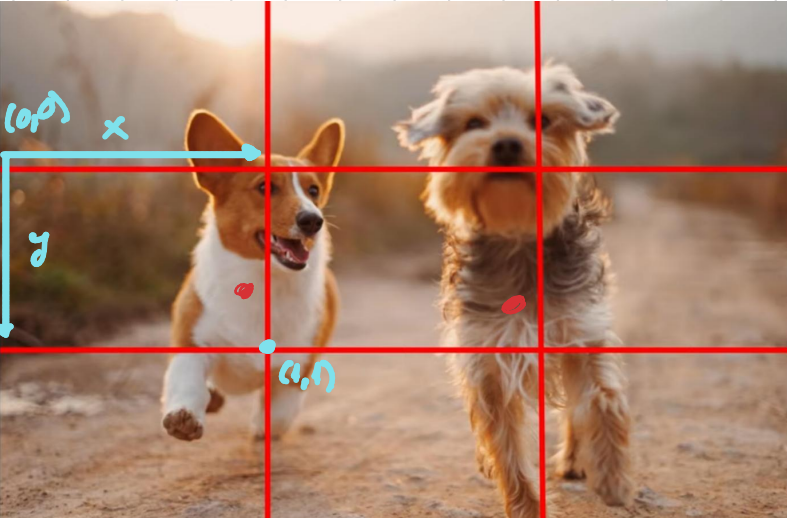


En cada celda se predice 2 BB, en la que cada BB tiene una puntuación de confianza (confidence score), es decir, la confianza que tiene el modelo diciendo que en dicha celda haya un objeto.

Las **etiquetas** o **labels** de cada objeto se definen de la siguiente manera, label<sub>cell</sub> = (c<sub>1</sub>, c<sub>2</sub>, ..., c<sub>N</sub>, p<sub>c</sub>,x,y,w,h):
* c<sub>1</sub>...c<sub>N</sub> donde N es el numero de clases que hay (dependiendo del dataset) y c<sub>i</sub> hace referencia a la clase a la que perenece
* p<sub>c</sub> hace referencia a la probabiliada de que hay un objeto en esa celda
* x, y hace referencia al centro de la BB
* w, h hace referencia al ancho y alto de la BB (width and height)

Las **predicciones** son muy similares, pero con 2 BB, es decir, predict<sub>cell</sub> = (c<sub>1</sub>, c<sub>2</sub>, ..., c<sub>N</sub>, p<sub>c1</sub>,x<sub>1</sub>,y<sub>1</sub>,w<sub>1</sub>,h<sub>1</sub>, p<sub>c1</sub>,x<sub>2</sub>,y<sub>2</sub>,w<sub>2</sub>,2<sub>2</sub>). El significado de la nomenclatura es la misma, pero al ser las predicciones del modelo y cada celda predice 2 BB, se especifica esto con un subindice.

## **YOLO model**

In [1]:
!python YOLOv1.py

/opt/conda/lib/python3.11/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
2024-05-14 14:41:26.330962: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-14 14:41:26.333447: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-14 14:41:26.374923: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler 

| Model      | Parameters | Precio Total Size |
|:--------------  |:--------:|----------------:|
| YOLOv1      | 271,716,734       | 1475.71 (MB)           |

In [9]:
import mercury as mr
mr.PDF("Architecture/YOLO/YOLOv1.pdf")

## **Versions of YOLO**

Existen muchas versiones de YOLO en las que se han ido modificando la arquitectura, hasta llegar a obtener modelos muy complejos, que permiten resolver problemas de grandes dificultades.

Estos modelos son eficaces, pero no están diseñados para ser implementados en dispositivos con recursos limitados. Por ello, vamos a incidir en el uso de arquitecturas más simple, conexiones de CNN y FC, que permiten una fácil implemntación y además buscamos  que la arquitectura sea lo más simple posible.

## **YOLOv1 Backbone Vgg16 or ResNet**

Para permitir un rápido desarrollo de un modelo funcional, lo deseable es poder hacer usos de modelos preentrenados que faciliten o aceleren el fine-tuning del modelo y llegar a buenas soluciones, antes y evitar reducir el uso del gasto computacional.

Por ello, se ha osbervado que en el caso de VGG16 y ResNet-50, son arquitecturas muy similares al cuerpo de YOLOv1, donde estos modelos han sido entrenados para un problema de clasificación. Por tanto, se tienen que realizar una serie de modificaciones en estos modelos, para poder implementarlo como modelos de detección de YOLOv1.

En ambos casos, para conseguir esto, se han eliminado las ultimas capas de VGG16 o ResNet-50, y han sido conectadas a unas FC. (Tal y como se muestra en el fichero de Python ***backbone.py***

#### **VGG16**

A continuación se muestra la arquitectura original de VGG16

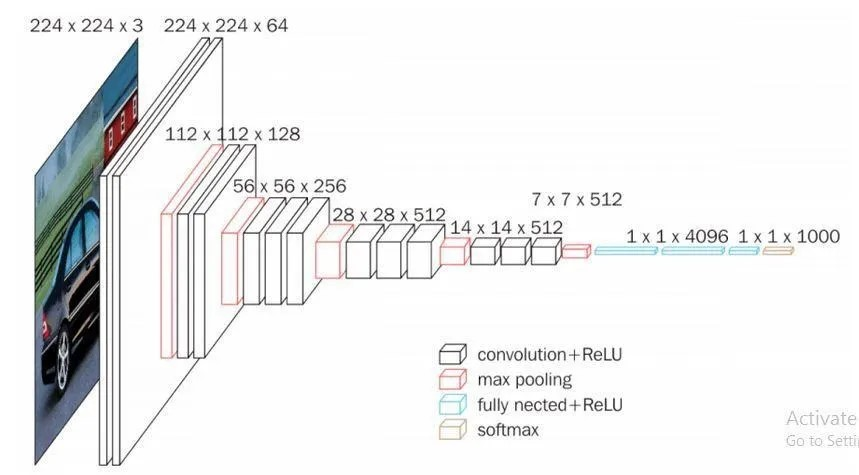

In [3]:
from IPython.display import Image

# Reemplaza 'imagen.jpg' con la ruta del archivo de imagen en tu equipo
imagen = Image('Architecture/vgg16/vgg16.jpg')

# Muestra la imagen en la celda
display(imagen)


A esta arquitectura de VGG16, se le ha eliminado las ultimas FC y softmax, y han sido reemplazadas por las necesarias en YOLOv1. Además ciertas modificaciones adicionales se han realizado para poder tener una imagen de entrada de 448x448.

In [4]:
from backbone import print_info
print_info('vgg16', S=7, B=2, C=20)

/opt/conda/lib/python3.11/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
2024-05-14 14:41:36.408471: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-14 14:41:36.410647: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-14 14:41:36.452301: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler 

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 448, 448]           1,792
              ReLU-2         [-1, 64, 448, 448]               0
            Conv2d-3         [-1, 64, 448, 448]          36,928
              ReLU-4         [-1, 64, 448, 448]               0
         MaxPool2d-5         [-1, 64, 224, 224]               0
            Conv2d-6        [-1, 128, 224, 224]          73,856
              ReLU-7        [-1, 128, 224, 224]               0
            Conv2d-8        [-1, 128, 224, 224]         147,584
              ReLU-9        [-1, 128, 224, 224]               0
        MaxPool2d-10        [-1, 128, 112, 112]               0
           Conv2d-11        [-1, 256, 112, 112]         295,168
             ReLU-12        [-1, 256, 112, 112]               0
           Conv2d-13        [-1, 256, 112, 112]         590,080
             ReLU-14        [-1, 256, 1

| Model      | Parameters | Estimated Total Size |
|:--------------  |:--------:|----------------:|
| vgg16      | 123,501,822       | 1347.48 (MB)           |

#### **ResNet-50**

Siguiendo la misma filosofía que con **VGG16** a este modelo de clasificación también se le han suprimido las últimas capas y han sido reemplazadas por FC.

In [1]:
from backbone import print_info
print_info('resnet50', S=7, B=2, C=20)

/opt/conda/lib/python3.11/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
2024-05-22 08:43:33.366981: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-22 08:43:33.369199: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-22 08:43:33.411248: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler 

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           9,408
       BatchNorm2d-2         [-1, 64, 224, 224]             128
              ReLU-3         [-1, 64, 224, 224]               0
         MaxPool2d-4         [-1, 64, 112, 112]               0
            Conv2d-5         [-1, 64, 112, 112]           4,096
       BatchNorm2d-6         [-1, 64, 112, 112]             128
              ReLU-7         [-1, 64, 112, 112]               0
            Conv2d-8         [-1, 64, 112, 112]          36,864
       BatchNorm2d-9         [-1, 64, 112, 112]             128
             ReLU-10         [-1, 64, 112, 112]               0
           Conv2d-11        [-1, 256, 112, 112]          16,384
      BatchNorm2d-12        [-1, 256, 112, 112]             512
           Conv2d-13        [-1, 256, 112, 112]          16,384
      BatchNorm2d-14        [-1, 256, 1

| Model      | Parameters | Estimated Total Size |
|:--------------  |:--------:|----------------:|
| ResNet50      | 237,153,790       | 2054.74 (MB)           |

#### **Comparando los tamaños de los 3 modelos**

Como una de las primeras comparativas, podemos comparar los tamaños de los 3 modelos, es decir, si originalmente contasemos con el modelo al que preentrenariamos por nuestra cuenta, vs, utilizando los modelos preentrenados.

| Model      | Parameters | Estimated Total Size |
|:--------------  |:--------:|----------------:|
| YOLOv1      | 271,716,734       | 1475.71 (MB)           |
| vgg16      | 123,501,822       | 1347.48 (MB)           |
| ResNet50      | 237,153,790       | 2054.74 (MB)           |

*Más adelante se van a realizar más comparativas entre los 3 modelos, comparando un entrenamiento y ver como evoluciona en cada uno de los casos bajo mismas condicione*

## **YOLO + efficientNet**

EfficientNet es un modelo ([paper](https://arxiv.org/pdf/1905.11946)) diseñado por Google, del cual tienen publicados los pesos de este modelo preentrenado y de diferentes tamaños.

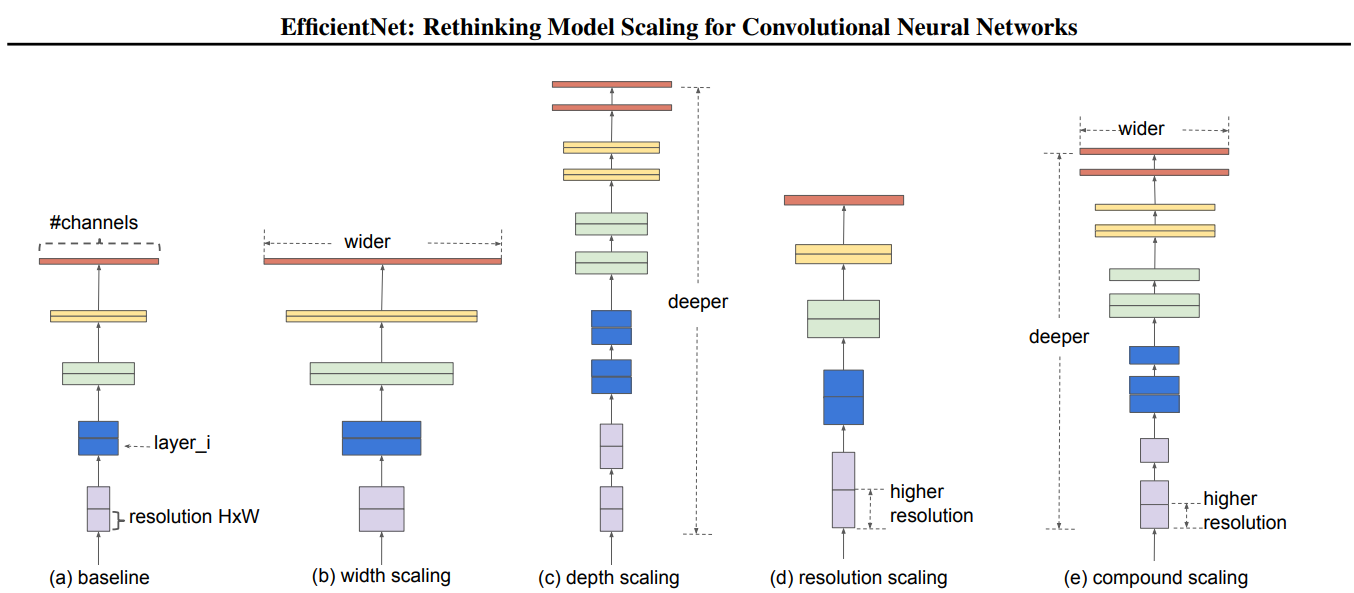

Este modelo al igual que los anteriores, es un modelo de clasificación, por tanto hay que realizar una serie de ajustes para que se pueda ajustar a la idea de YOLO para poder sresolver problemas de detección. Además en nuestro caso, nos hemos centrado en utilizar el modelo preentrenado que hay en pytorch de efficientnet-D0, ya que es el modelo más pequeño que se ofrece desde pytorch y nos va a facilitar su uso.

*Aunque existan modelos de EfficientDet que es una versión adaptada de EfficientNet, estos model tienen una arquitectura más compleja para su posterior implementación en dispositivos como FPGAs*

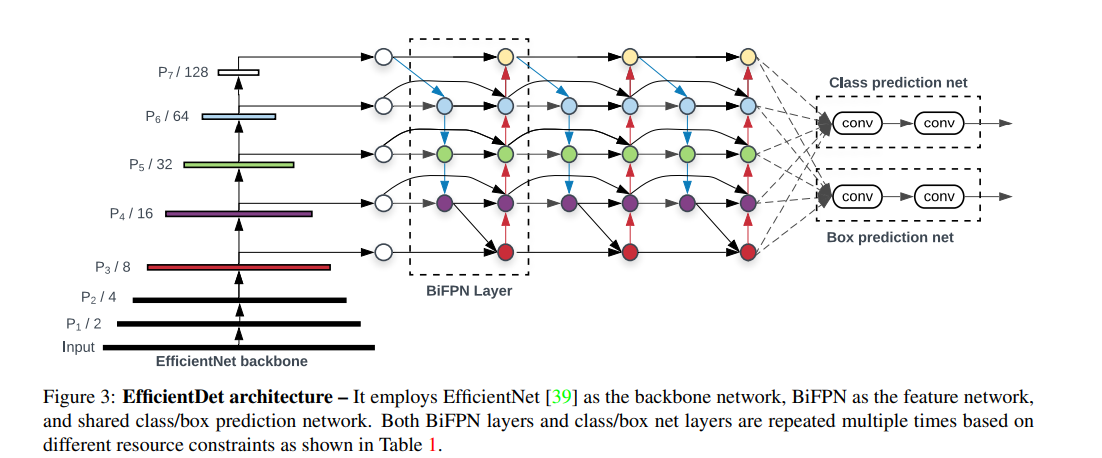

Por tanto, el reusmen de modelo de efficientNet ajustado a YOLO queda de la siguiente manera:

In [6]:
from backbone import print_info
print_info('efficientnet', S=7, B=2, C=20)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
              SiLU-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
              SiLU-6         [-1, 32, 112, 112]               0
 AdaptiveAvgPool2d-7             [-1, 32, 1, 1]               0
            Conv2d-8              [-1, 8, 1, 1]             264
              SiLU-9              [-1, 8, 1, 1]               0
           Conv2d-10             [-1, 32, 1, 1]             288
          Sigmoid-11             [-1, 32, 1, 1]               0
SqueezeExcitation-12         [-1, 32, 112, 112]               0
           Conv2d-13         [-1, 16, 112, 112]             512
      BatchNorm2d-14         [-1, 16, 1

In [3]:
35847754*(32/8)/1024**2

136.74832916259766

In [11]:
import mercury as mr
mr.PDF("Architecture/efficientnet/efficientnet_b0.pdf")

| Model      | Parameters | Param Total Size |
|:--------------  |:--------:|----------------:|
| efficientnet-b0-YOLO      | 35,847,754       | 136.75 (MB)           |

En cuanto a tamaño de modelo podemos observar que hemos reducido en 1/4 la memoria que ocupa este modeloo en comparación con lo observado anteriormente.

*Aunque las FC1 en este caso es 496 en vez de 4096*

## **TinyissimoYOLO**

TinyissimoYOLO es un modelo que ofrece muy buenas prestaciones, para ser un modelo muy pequeño ([paper](https://arxiv.org/pdf/2306.00001)). Sigue siendo una arquitectura solo de CNN y FC tal y como se muestra en la siguiente figura:

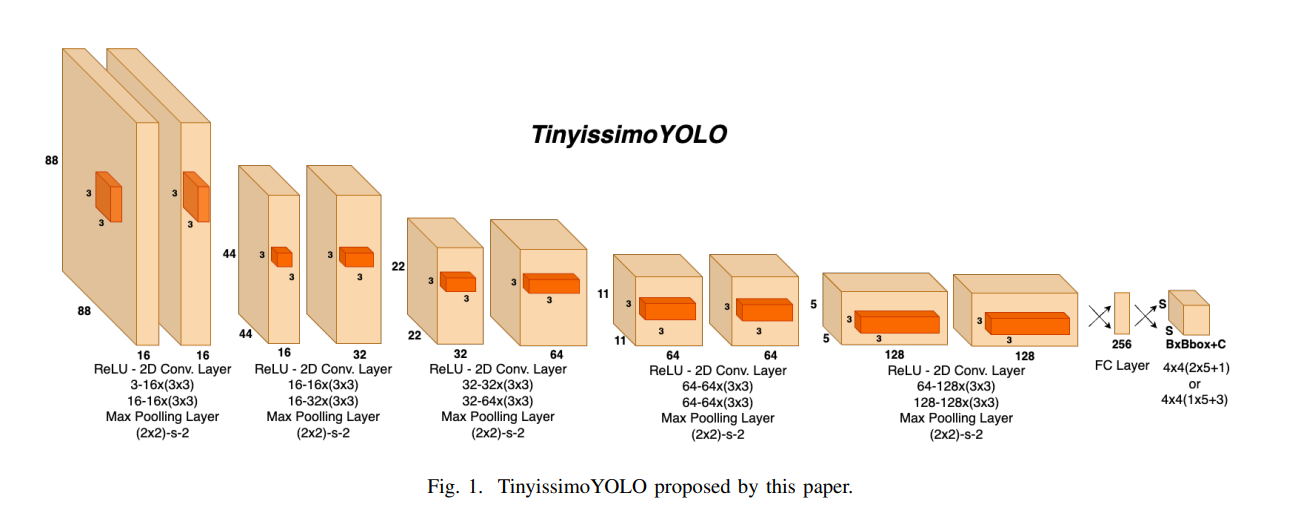

Este modelo tiene como fin poder ser implentado en dispositivos con recursos limitados.

In [7]:
from tinyissimo_model import print_info
print_info()

2024-06-03 15:18:22.763689: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 88, 88]             432
       BatchNorm2d-2           [-1, 16, 88, 88]              32
         LeakyReLU-3           [-1, 16, 88, 88]               0
          CNNBlock-4           [-1, 16, 88, 88]               0
            Conv2d-5           [-1, 16, 88, 88]           2,304
       BatchNorm2d-6           [-1, 16, 88, 88]              32
         LeakyReLU-7           [-1, 16, 88, 88]               0
          CNNBlock-8           [-1, 16, 88, 88]               0
         MaxPool2d-9           [-1, 16, 44, 44]               0
           Conv2d-10           [-1, 16, 44, 44]           2,304
      BatchNorm2d-11           [-1, 16, 44, 44]              32
        LeakyReLU-12           [-1, 16, 44, 44]               0
         CNNBlock-13           [-1, 16, 44, 44]               0
           Conv2d-14           [-1, 32,

NameError: name 'wirter' is not defined

| Model      | Parameters | Param Total Size |
|:--------------  |:--------:|----------------:|
| TinyissimoYOLO      | 981,232       | 3.74 (MB)           |


Ahora hemos conseguido reducir en 1/10 el tamaño del modelo en comparación con los modelos que teníamos de YOLOv1.

## **Bed Model**

Al igual que TinyissimoYOLO, BedModel es un modelo pequeño diseñado para ser implentado en dispositivos limitados ya que también es un modelo simple y bastante ligero

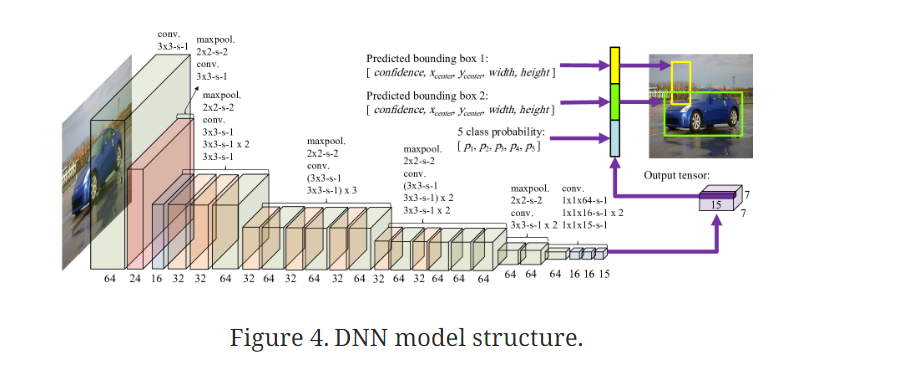

In [1]:
from bed_model import print_info

/opt/conda/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


Hemos contemplado la situacion en la que la architectura de BedModel que es una red completa de CNN se conecta a 2 FC con el fin de asemejarse a lo qus¡e se acepta en las salidas de YOLO

In [2]:
print_info('bed_model' , S=7, B=2, C=20)

2024-06-02 10:13:12.998579: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,728
       BatchNorm2d-2         [-1, 64, 224, 224]             128
         LeakyReLU-3         [-1, 64, 224, 224]               0
          CNNBlock-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6         [-1, 24, 112, 112]          13,824
       BatchNorm2d-7         [-1, 24, 112, 112]              48
         LeakyReLU-8         [-1, 24, 112, 112]               0
          CNNBlock-9         [-1, 24, 112, 112]               0
        MaxPool2d-10           [-1, 24, 56, 56]               0
           Conv2d-11           [-1, 16, 56, 56]           3,456
      BatchNorm2d-12           [-1, 16, 56, 56]              32
        LeakyReLU-13           [-1, 16, 56, 56]               0
         CNNBlock-14           [-1, 16,

| Model      | Parameters | Param Total Size |
|:--------------  |:--------:|----------------:|
| BedModel_FC      |    957,275    | 3.65 (MB)           |


# **LOSS function**

Para el entrenaiento de los modelos que se realiará más adelante, hay una serie de funciones que hay que definir para poder realizar un correcto entrenamiento del modelo, como por ejemplo, **loss function**, en el paper de YOLOv1([paper](https://arxiv.org/pdf/1506.02640)) hablan de la función de pérdida.

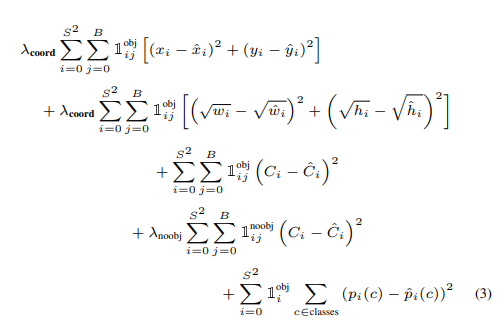

En el que se le puede dar la siguiente interpretación:
* La primera linea, es las perdidas por escoger más el centro de la BB
* El siguiente esta relacionado con las perdidas por no escoger un ancho o alto del objeto que se corresponda, con lo esperado
* Las dos siguientes hacen referencia a cuando se dice cuando hay objeto cuando no, y viceversa
* Perdidas por no escoger bien la clase

# **Evitando sobreespecialización**

## **Augmentation**
Para conseguir aumentar el número de datos se ha optado por hacer uso de las trasnformaciones de la base de datos. 

Cuando entrenamos una red, hay que hacer peticiones en cada época sobre los mismos datos en forma de lotes (batches), siempre son los mismos, entonces el modelo es capaz de generalizar y aprenderse estos datos. Por tanto, para tratar de evitar esto, se incluye las transformaciones, en la que en cada época, cada dato, en este caso las imagenes y etiquetas, son modificadas con una probabilidad p. En nuestro caso, el tipo de modificaciones realizadas son, invertir la imagen de manera horizontal y vertical, hacer la imagen más borrosa y aumentamos o disminuimos la saturación, brillo de la imagen...

## **L1 regularization**

## **L2 Regularization y Drop out y Weight Decay**